In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)

import sidetable as stb
from itertools import combinations
import researchpy as rp

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = None 

In [106]:
df = pd.read_csv('../data/train.csv', index_col = 0)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [107]:
# We are going to do a logistic regression analysis. Therefore it is necessary that all variables are represented in numerical form. We will convert the columns "sex" and "is_smoking".
# First, we check the unique values in each column.
df['sex'].unique()
df['is_smoking'].unique()

array(['F', 'M'], dtype=object)

array(['YES', 'NO'], dtype=object)

In [108]:
def change_to_number(text):
    if text == 'F' or text == 'YES':
        return 1
    if text == 'M' or text == 'NO':
        return 0
    else:
        return np.nan

In [109]:
df['sex'] = df['sex'].apply(change_to_number)
df['is_smoking'] = df['is_smoking'].apply(change_to_number)

In [110]:
# We check that the change was successful.
df['sex'].unique()
df['is_smoking'].unique()

array([1, 0])

array([1, 0])

In [111]:
df.shape

(3390, 16)

In [112]:
df.dtypes

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [113]:
df.duplicated().sum()
# We do not have duplicate rows.

0

### EXPLORE AND IMPUTE NULLS
-----
We have missing data that we need to replace. We will use the KNN Imputer approach for this.
However, if we have values with decimal places, we round them off to get whole numbers.

In [114]:
df.stb.missing()

,missing,total,percent
glucose,304,3390,8.967552
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
cigsPerDay,22,3390,0.648968
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
age,0,3390,0.000000
sex,0,3390,0.000000
is_smoking,0,3390,0.000000


In [115]:
def find_columns_with_nulls(dataframe):
    
    """Identify the columns in the dataset that contain missing values and make a list of these columns.
    Args:
        dataframe: dataframe where we want to find missing values.
    Returns:
        list: list of columns with missing values.
    """
    
    null_cols = []    

    null_df = dataframe.stb.missing()
    null_df = null_df[null_df['percent'] > 0].reset_index()

    for nombre_col in null_df['index']:
        null_cols.append(nombre_col)

    return null_cols

In [116]:
def knn_imputer(dataframe):

    """Apply the KNN IMPUTER method.
    Args:
        dataframe: dataframe where we want to apply the method.
    Returns:
        dataframe: dataframe whitout missing values.
    """
    
    imputerKNN = KNNImputer(n_neighbors=5)
    imputerKNN.fit(dataframe)
    dataframe_knn= imputerKNN.transform(dataframe)

    df_knn_imputer = pd.DataFrame(dataframe_knn, columns = dataframe.columns)
    columnas_knn = df_knn_imputer.columns
    dataframe.drop(columnas_knn, axis = 1, inplace = True)
    dataframe[columnas_knn] = dataframe_knn
    
    return dataframe

In [117]:
def find_and_clean_null_values(dataframe):

    """Apply the KNN IMPUTER method and round the result for non-decimal values.
    Args:
        dataframe: dataframe for null value imputation.
    Returns:
        dataframe: dataframe whitout missing values.
    """
    
    columns_with_nulls = find_columns_with_nulls(dataframe)
    dataframe_result = knn_imputer(dataframe)
    dataframe_result[columns_with_nulls] = dataframe[columns_with_nulls].round()

    return dataframe_result

In [118]:
df = find_and_clean_null_values(df)

In [119]:
# We check that we have not any missing value.

df.stb.missing()

,missing,total,percent
age,0,3390,0.0
education,0,3390,0.0
sex,0,3390,0.0
is_smoking,0,3390,0.0
cigsPerDay,0,3390,0.0
BPMeds,0,3390,0.0
prevalentStroke,0,3390,0.0
prevalentHyp,0,3390,0.0
diabetes,0,3390,0.0
totChol,0,3390,0.0


In [120]:
# Some columns are categorical variables, despite containing numerical data. We change the variable types.

categorical_list = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

for col in categorical_list:
    df[col] = df[col].astype('category')

In [121]:
# We ensure that the variable types have been updated.

df.dtypes

age                 float64
education          category
sex                category
is_smoking         category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

### EXPLORE CATEGORICAL AND NUMERICAL VARIABLES
----

In [122]:
# To continue the exploration, we divide the dataframe into categorical and numerical columns.

df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = ['category'])
df_cat.drop(['TenYearCHD'], axis = 1, inplace = True)

##### CATEGORICAL VARIABLES

In [123]:
df_cat.describe().T

,count,unique,top,freq
education,3390.0,4.0,1.0,1403.0
sex,3390.0,2.0,1.0,1923.0
is_smoking,3390.0,2.0,0.0,1703.0
BPMeds,3390.0,2.0,0.0,3290.0
prevalentStroke,3390.0,2.0,0.0,3368.0
prevalentHyp,3390.0,2.0,0.0,2321.0
diabetes,3390.0,2.0,0.0,3303.0


In [124]:
# We examine the frequency and percentages of categorical variables.

for col in df_cat:
    df.stb.freq([col])

,education,count,percent,cumulative_count,cumulative_percent
0,1.0,1403,41.386431,1403,41.386431
1,2.0,1043,30.766962,2446,72.153392
2,3.0,571,16.843658,3017,88.997050
3,4.0,373,11.002950,3390,100.000000


,sex,count,percent,cumulative_count,cumulative_percent
0,1.0,1923,56.725664,1923,56.725664
1,0.0,1467,43.274336,3390,100.000000


,is_smoking,count,percent,cumulative_count,cumulative_percent
0,0.0,1703,50.235988,1703,50.235988
1,1.0,1687,49.764012,3390,100.000000


,BPMeds,count,percent,cumulative_count,cumulative_percent
0,0.0,3290,97.050147,3290,97.050147
1,1.0,100,2.949853,3390,100.000000


,prevalentStroke,count,percent,cumulative_count,cumulative_percent
0,0.0,3368,99.351032,3368,99.351032
1,1.0,22,0.648968,3390,100.000000


,prevalentHyp,count,percent,cumulative_count,cumulative_percent
0,0.0,2321,68.466077,2321,68.466077
1,1.0,1069,31.533923,3390,100.000000


,diabetes,count,percent,cumulative_count,cumulative_percent
0,0.0,3303,97.433628,3303,97.433628
1,1.0,87,2.566372,3390,100.000000


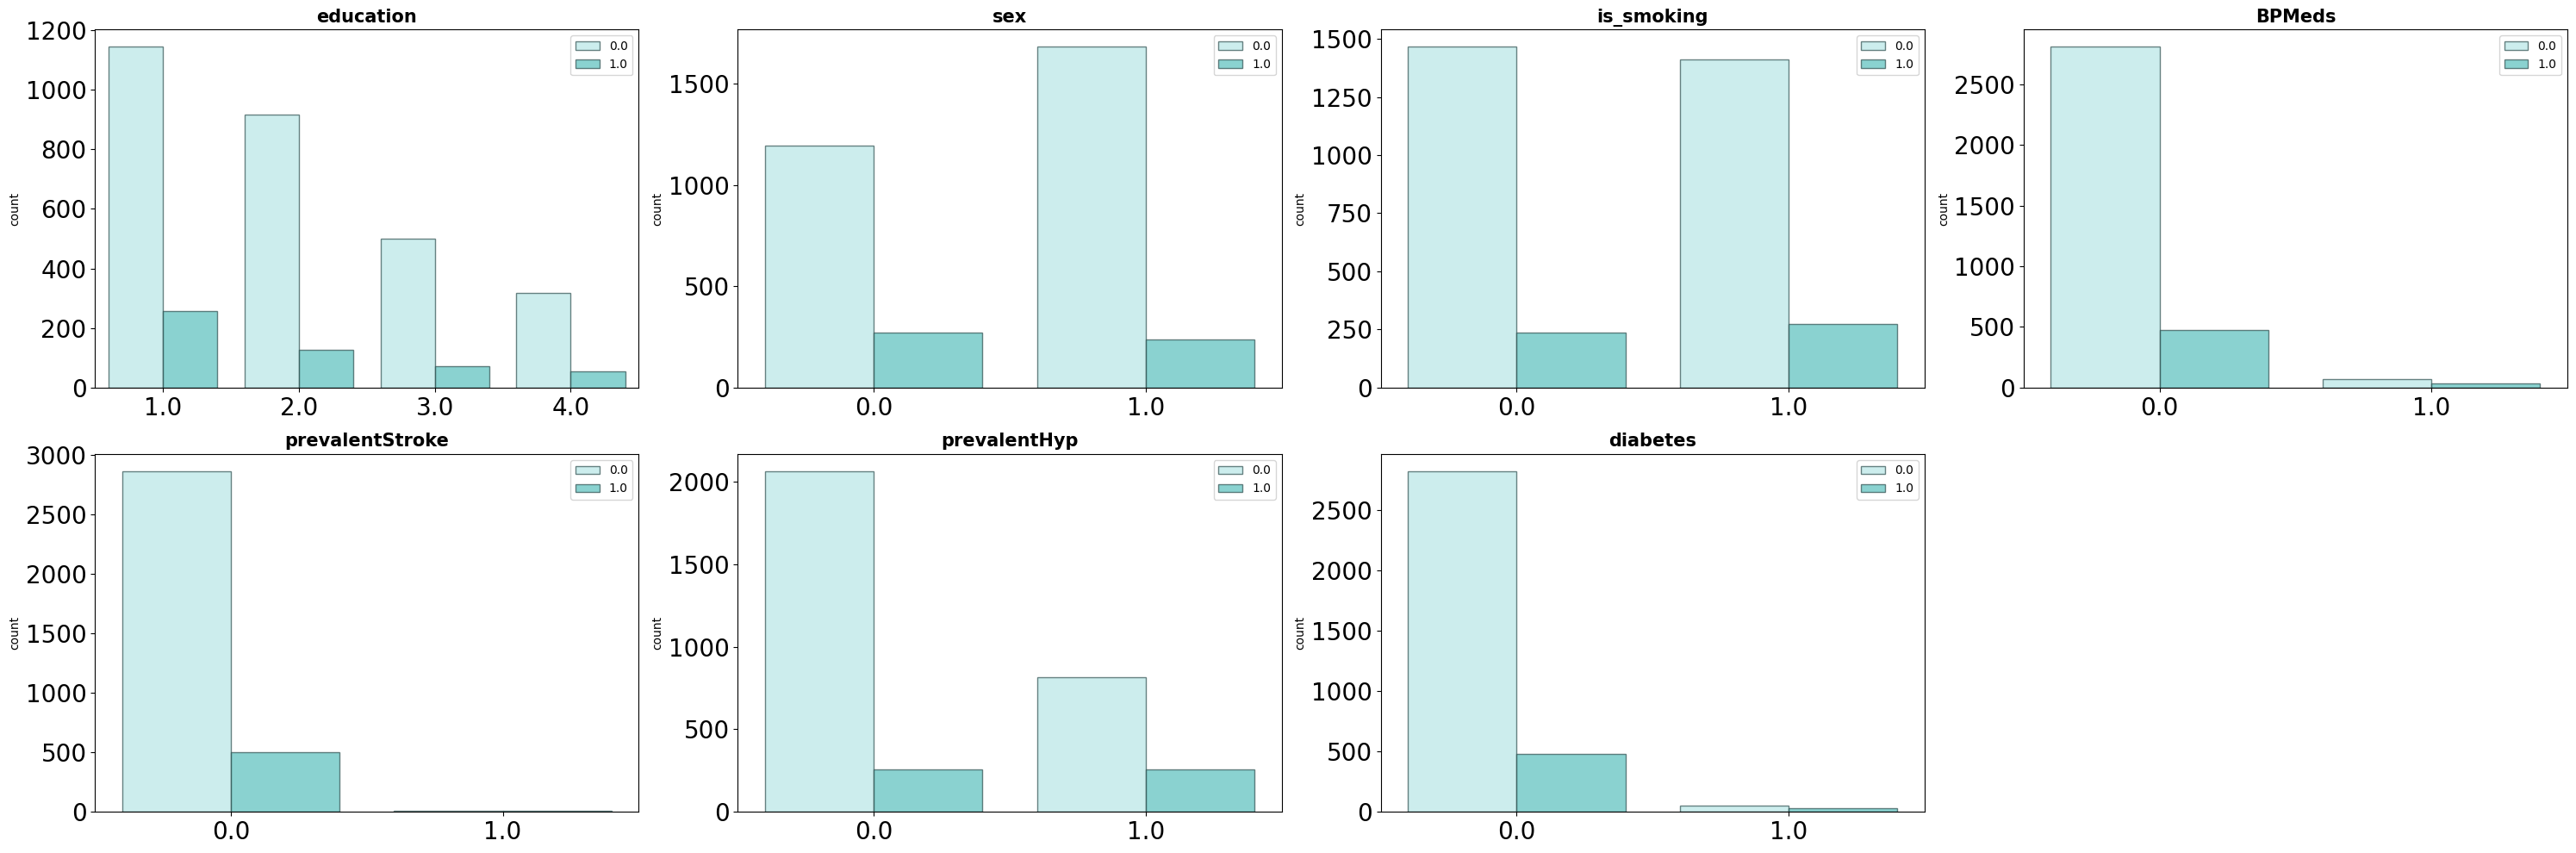

In [125]:
# We study the distribution of categorical variables with respect to the response variable.

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))
axes = axes.flat

my_palette_1 = ['paleturquoise', 'mediumturquoise']

for index, colum in enumerate(df_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = 'TenYearCHD',
        alpha = 0.7, 
        palette = my_palette_1,
        edgecolor = 'darkslategrey',
        ax = axes[index])
    
    axes[index].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[index].tick_params(labelsize = 20)
    axes[index].set_xlabel("")
    axes[index].legend(loc= "upper right")

fig.delaxes(axes[-1])
fig.tight_layout();

In [126]:
# We examine the correlation between categorical variables and the response variable.

for col in df_cat.columns:
    crosstab= rp.crosstab(df_cat[col], df['TenYearCHD'], prop = 'row')
        
    display(crosstab)

TenYearCHD              
TenYearCHD        0.0    1.0    All
education                          
1.0             81.61  18.39  100.0
2.0             87.82  12.18  100.0
3.0             87.39  12.61  100.0
4.0             85.52  14.48  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD        0.0    1.0    All
sex                                
0.0             81.46  18.54  100.0
1.0             87.57  12.43  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD        0.0    1.0    All
is_smoking                         
0.0             86.14  13.86  100.0
1.0             83.70  16.30  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD        0.0    1.0    All
BPMeds                             
0.0             85.47  14.53  100.0
1.0             67.00  33.00  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD             0.0    1.0    All
prevalentStroke                         
0.0                  85.12  14.88  100.0
1.0                  54.55  45.45  100.0
All                  84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0.0    1.0    All
prevalentHyp                         
0.0               88.97  11.03  100.0
1.0               76.15  23.85  100.0
All               84.93  15.07  100.0

TenYearCHD              
TenYearCHD        0.0    1.0    All
diabetes                           
0.0             85.53  14.47  100.0
1.0             62.07  37.93  100.0
All             84.93  15.07  100.0

##### NUMERICAL VARIABLES

In [127]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
cigsPerDay,3390.0,9.078171,11.850503,0.0,0.0,0.0,20.0,70.0
totChol,3390.0,237.097640,45.037831,107.0,206.0,234.0,264.0,696.0
sysBP,3390.0,132.601180,22.292030,83.5,117.0,128.5,144.0,295.0
diaBP,3390.0,82.883038,12.023581,48.0,74.5,82.0,90.0,142.5
BMI,3390.0,25.798230,4.119991,16.0,23.0,25.0,28.0,57.0
heartRate,3390.0,75.980236,11.971340,45.0,68.0,75.0,83.0,143.0
glucose,3390.0,82.006785,23.298776,40.0,72.0,78.0,86.0,394.0


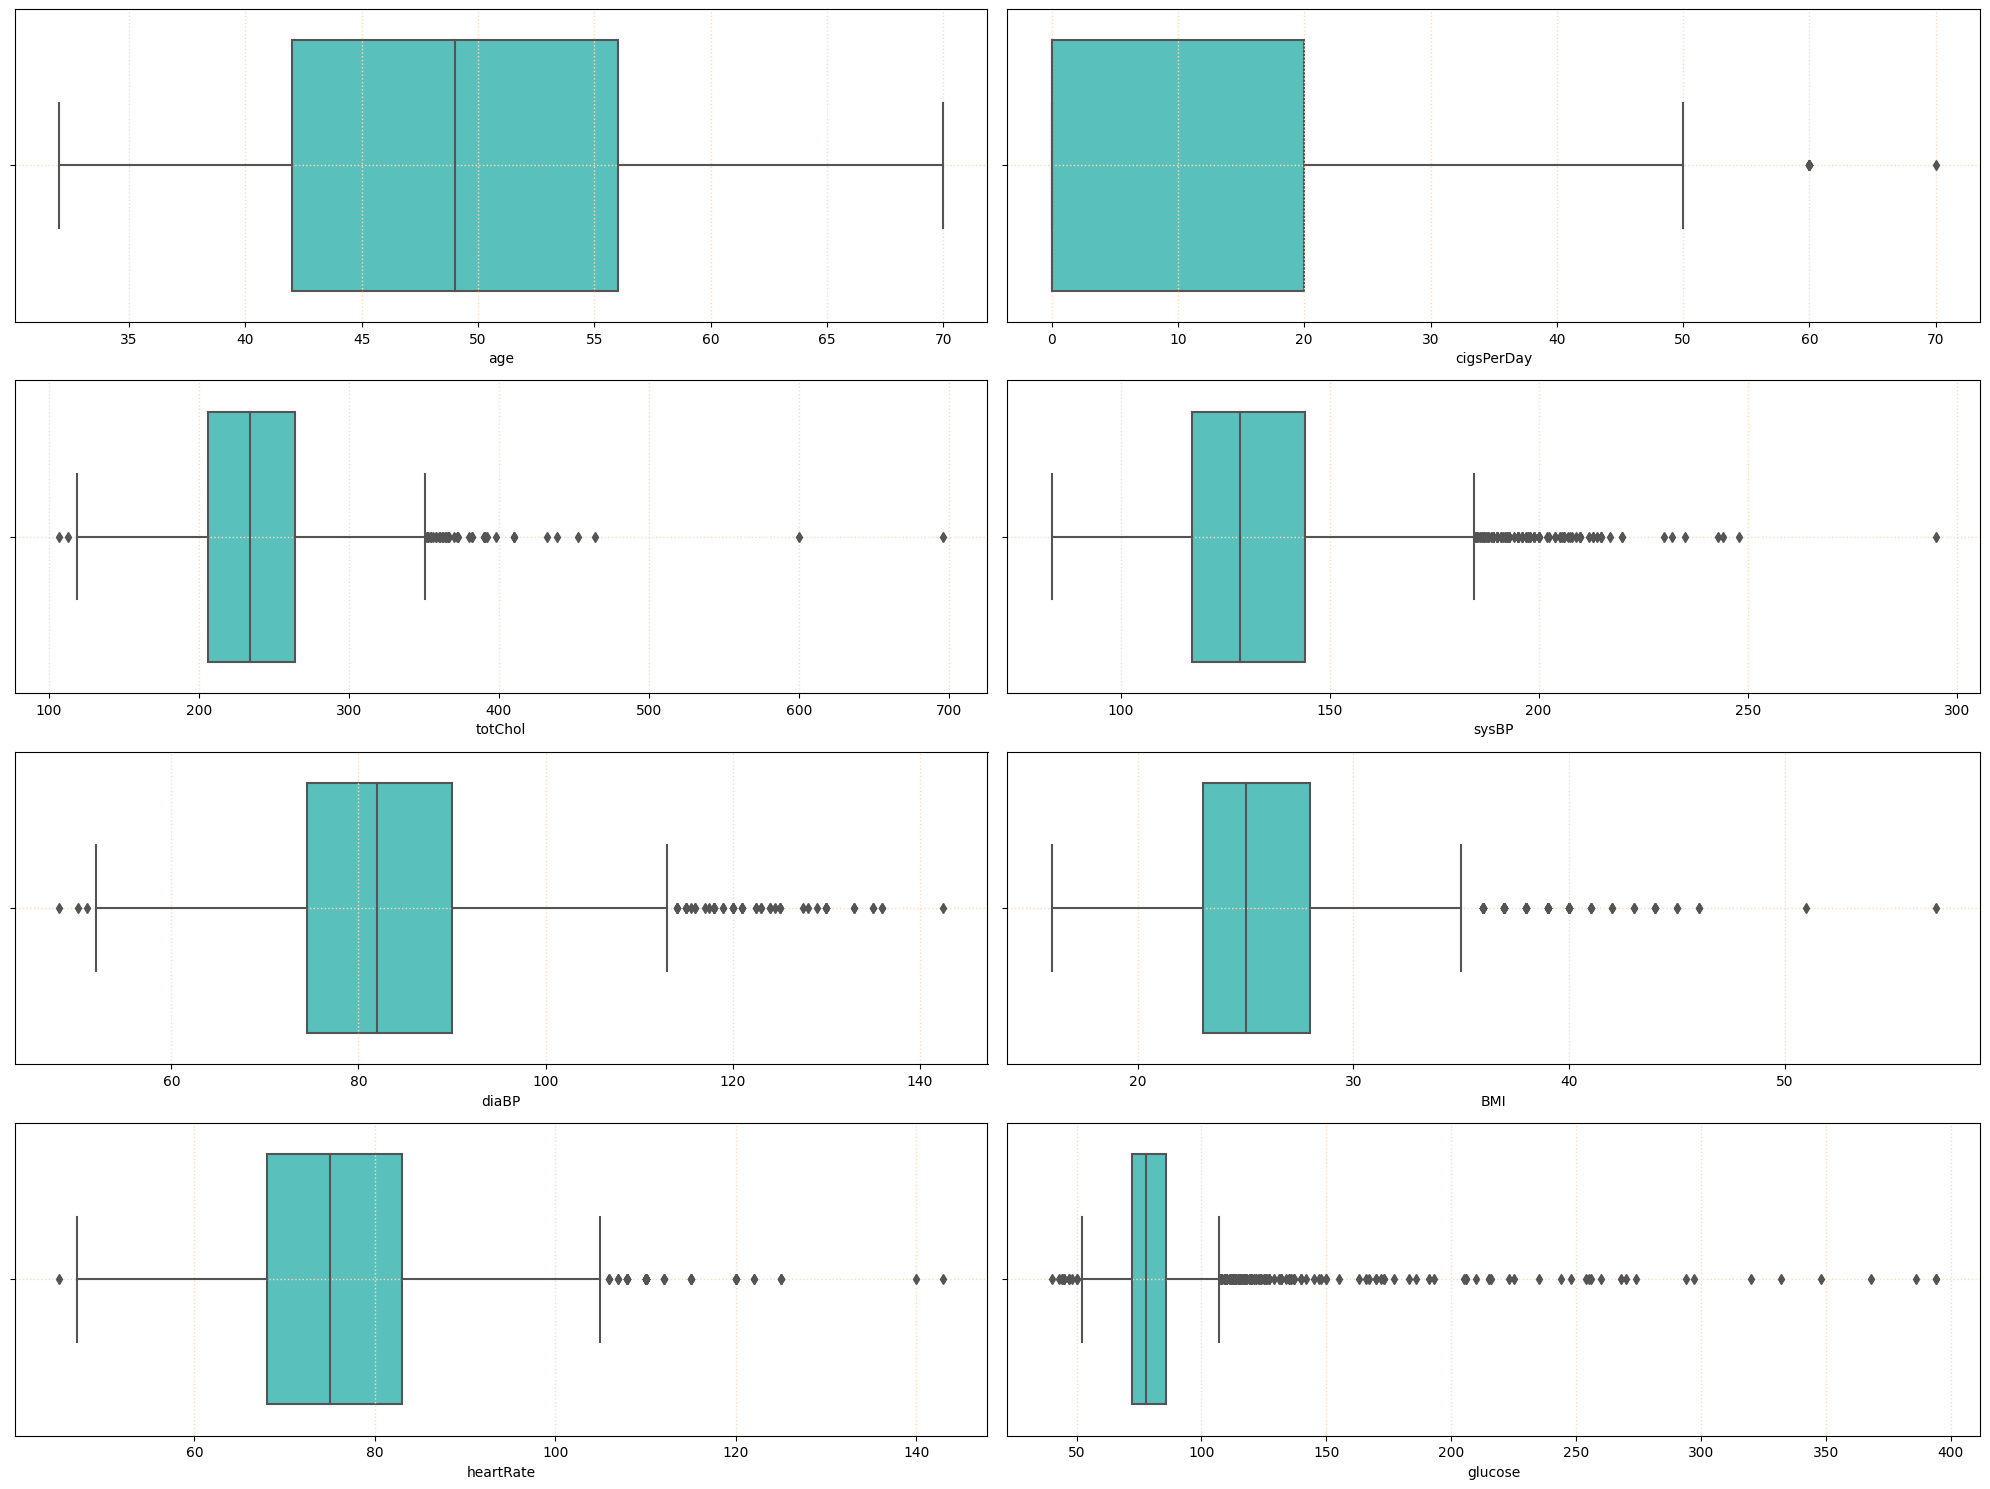

In [128]:
# We visually explore numerical variables: median, percentiles, outliers...

fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_num.columns):
    sns.boxplot(x = df_num[columna],
        data = df, ax=axes[indice], 
        color = 'mediumturquoise'),
    axes[indice].grid(color= 'peachpuff', linestyle= 'dotted', linewidth = 1)
    
plt.tight_layout()
plt.show();

We have many outliers, but they are possible values in the medical field and may be interesting for our predictions. We do not manipulate them.

<Axes: >

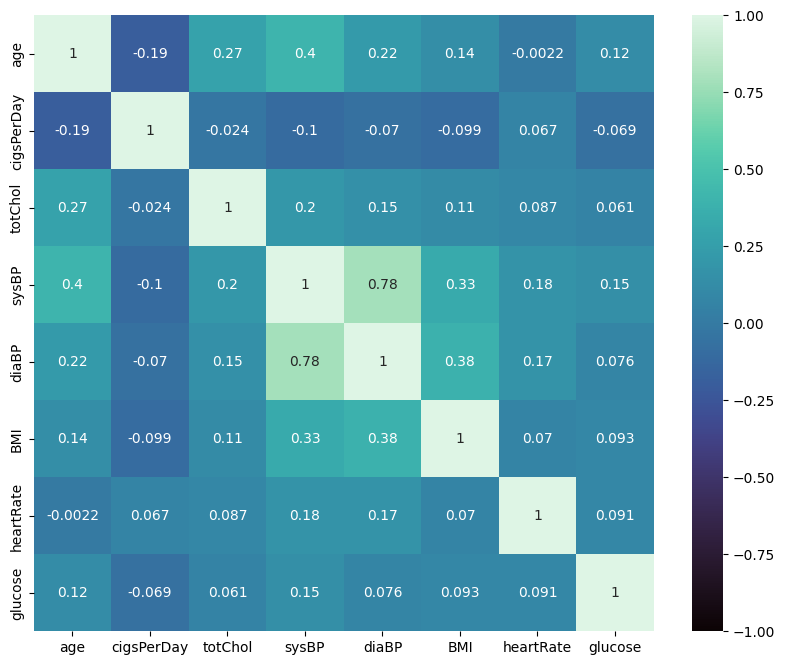

In [129]:
# We investigate the correlation among numerical categories.

sns.heatmap(df_num.corr(),
            annot = True,
            vmin = -1,
            cmap = 'mako',
            vmax = 1)

We only have a strong correlation in the columns for systolic blood pressure (sysBP) and diastolic blood pressure (diaBP), which makes sense as these are the two values used to measure blood pressure. If one of them increases, the other usually increases as well.

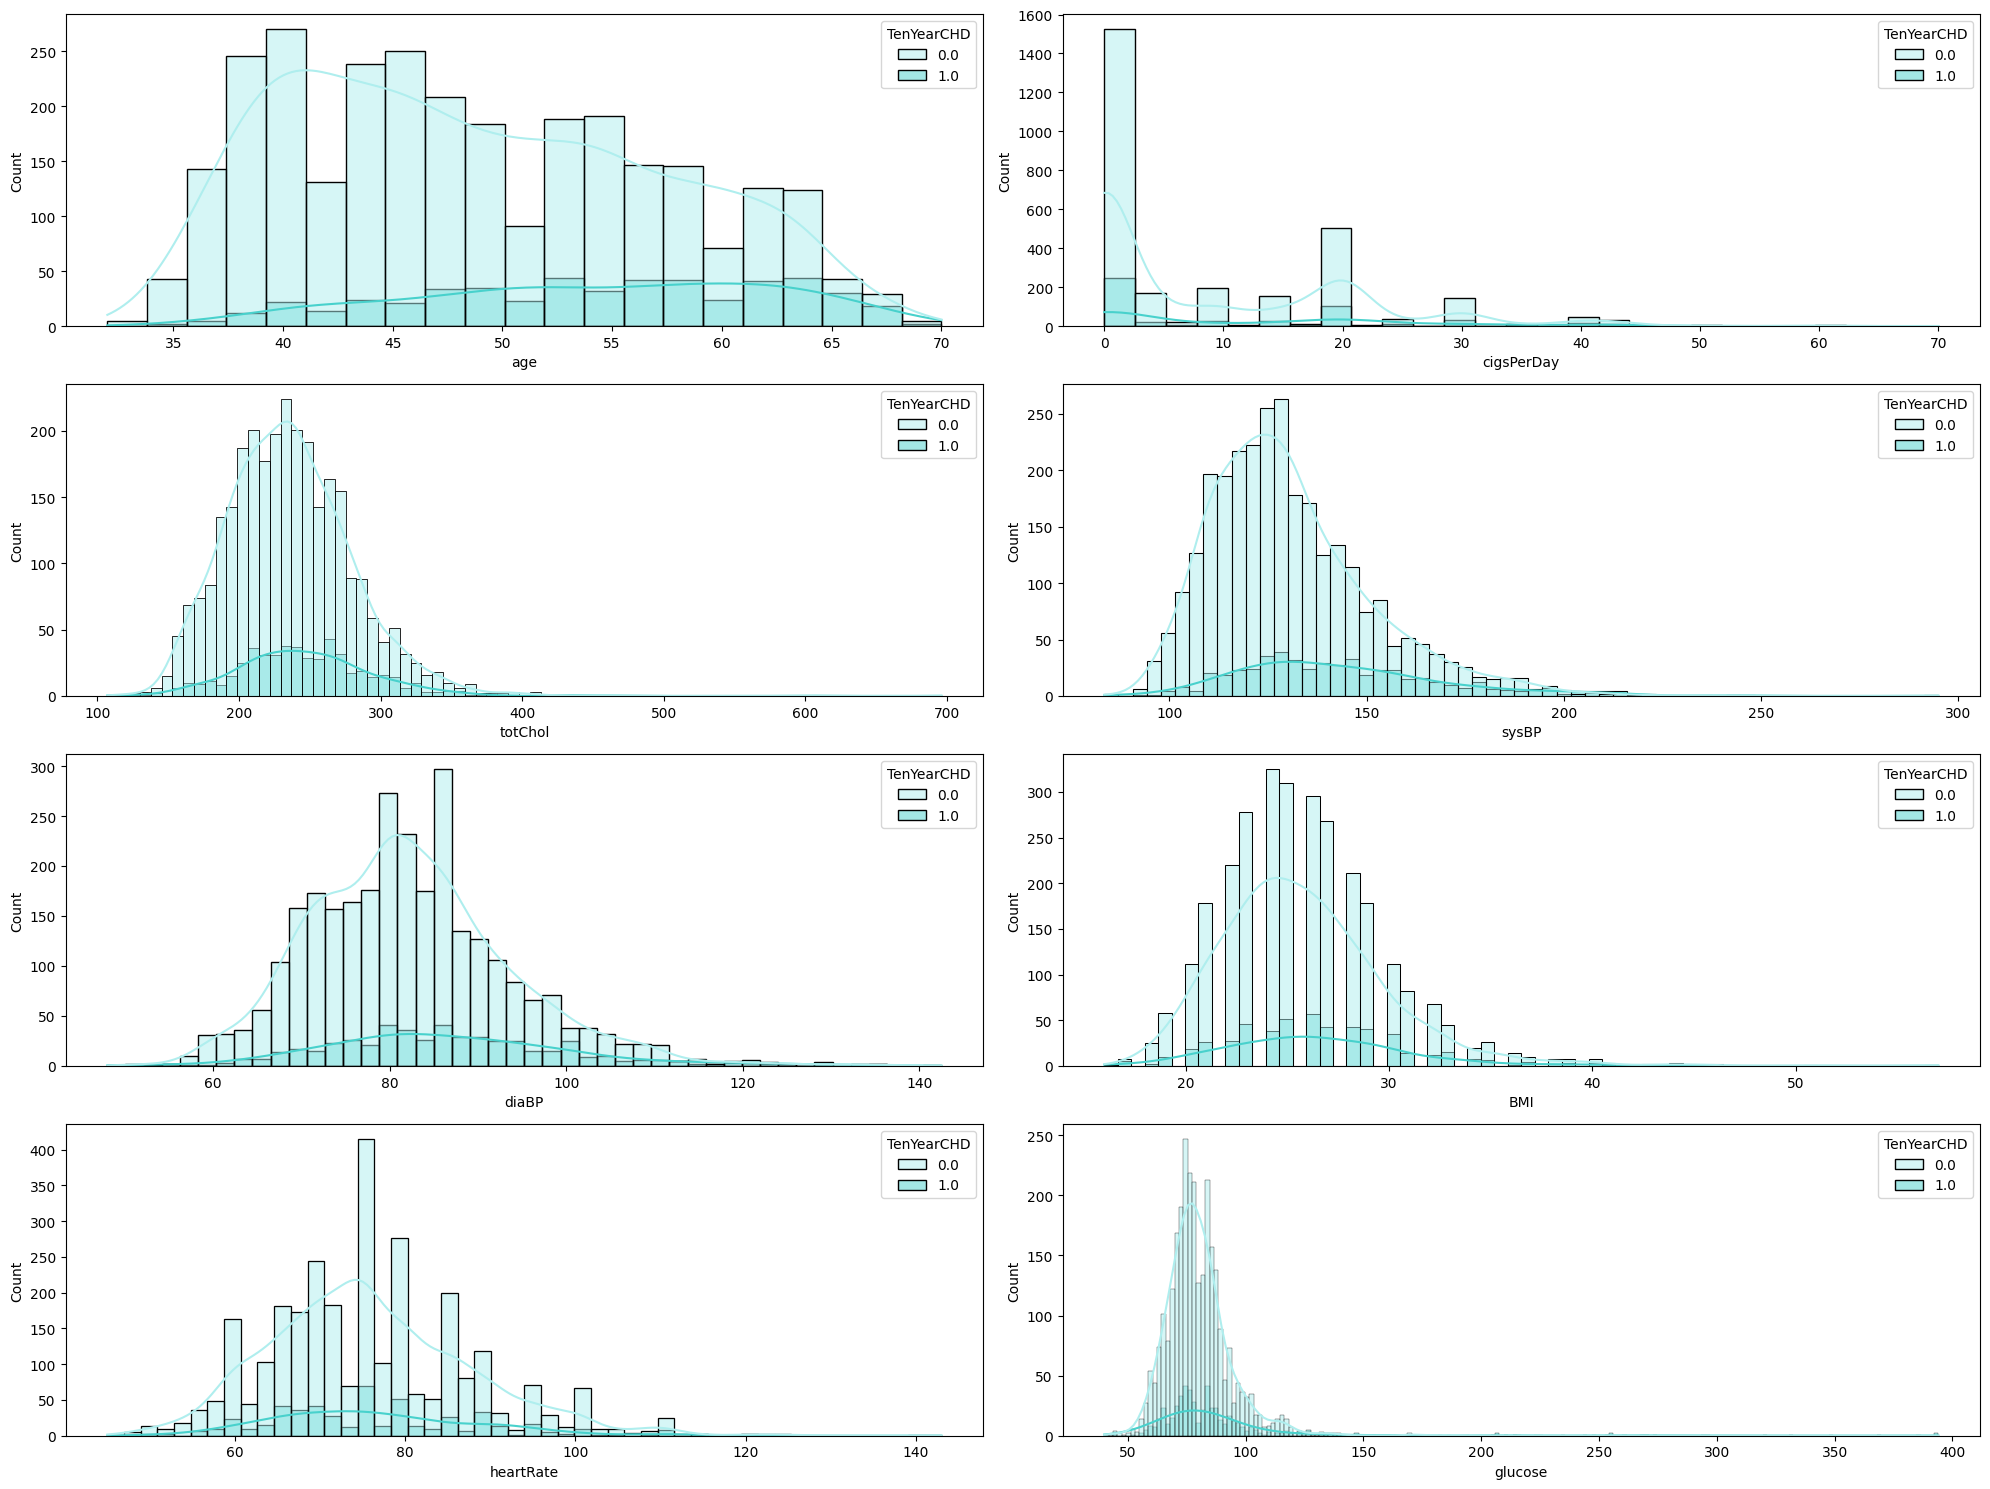

In [130]:
# We study the distribution of numerical variables with respect to the response variable.

fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

my_palette_2 = ['paleturquoise', 'mediumturquoise']

for indice, columna in enumerate(df_num.columns):
        sns.histplot(x = df_num[columna],
            hue = 'TenYearCHD',
            data = df,
            ax=axes[indice], 
            palette = my_palette_2,
            kde = True)
plt.tight_layout()
plt.show();

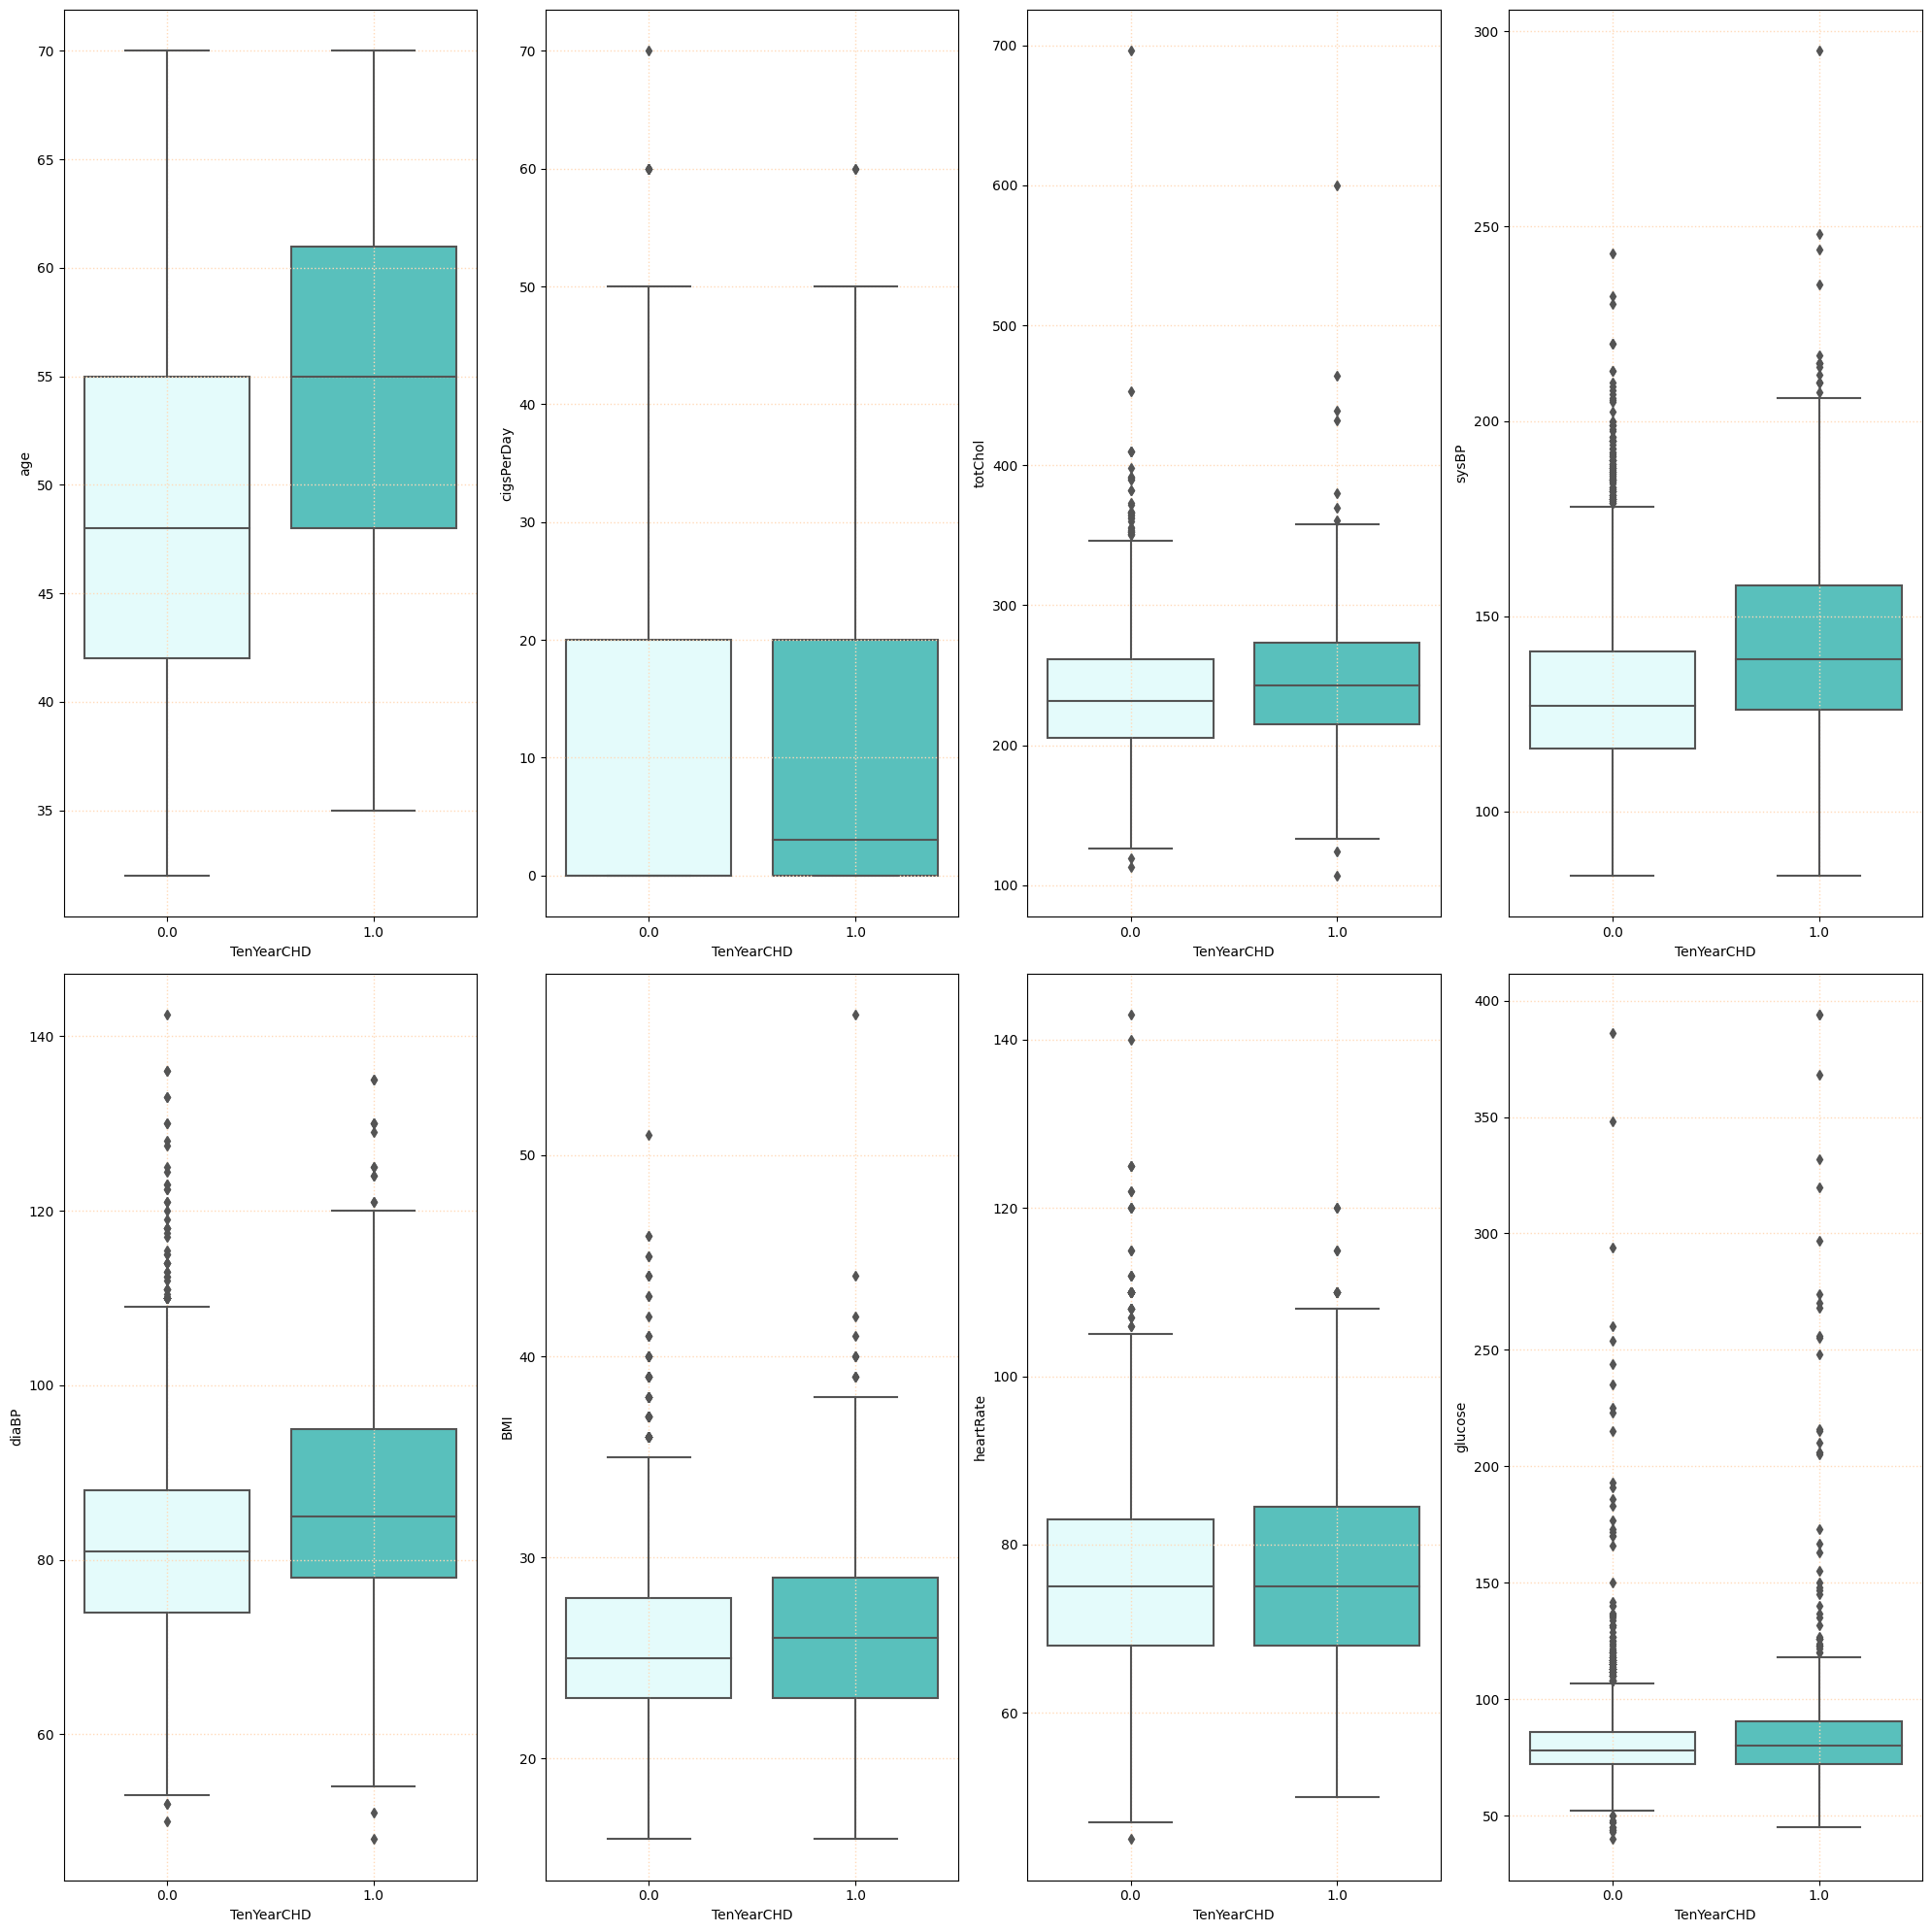

In [131]:
# We examine the correlation between numerical variables and the response variable.

fig, axes = plt.subplots(2, 4, figsize=(20,20))
axes = axes.flat

my_palette_3 = ['lightcyan', 'mediumturquoise']

for indice, columna in enumerate(df_num.columns):
        sns.boxplot(y = df_num[columna],
            x = 'TenYearCHD',
            data = df,
            palette = my_palette_3,
            ax=axes[indice])
        axes[indice].grid(color= 'peachpuff', linestyle= 'dotted', linewidth = 1)
        
plt.tight_layout()
plt.show();

##### RESPONSE VARIABLE

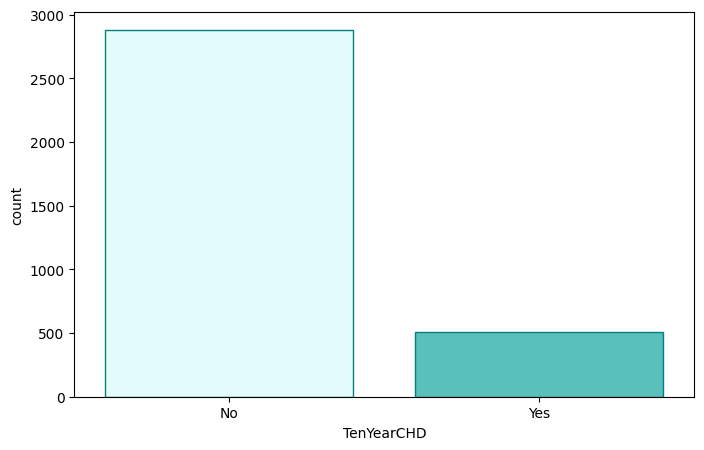

In [132]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = 'TenYearCHD',  palette = my_palette_3,  edgecolor='teal')
fig1.set(xticklabels=['No', 'Yes']) 

plt.show();

In [133]:
# We check the percentage.

df['TenYearCHD'].value_counts() / df.shape[0]

TenYearCHD
0.0    0.849263
1.0    0.150737
Name: count, dtype: float64

SAVE DATA

In [134]:
df.to_pickle('../data/cardio_risk.pkl')
df_num.to_pickle('../data/df_num.pkl')
df_cat.to_pickle('../data/df_cat.pkl')